In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import string
import re
from spellchecker import SpellChecker
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import model_selection

In [2]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Display Data

In [3]:
cls = data.target.value_counts()

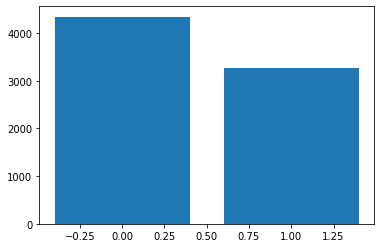

In [4]:
plt.bar(cls.index,cls)
plt.show()

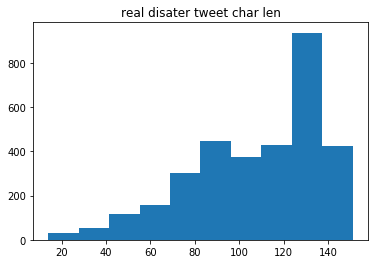

In [5]:
wordlen = data[data['target']==1]['text'].str.len()
plt.hist(wordlen)
plt.title("real disater tweet char len")
plt.show()

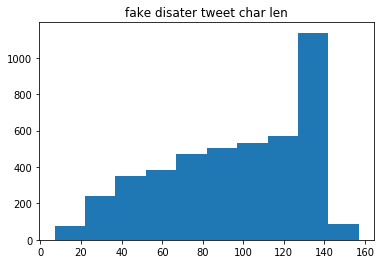

In [6]:
wordlen = data[data['target']==0]['text'].str.len()
plt.hist(wordlen)
plt.title("fake disater tweet char len")
plt.show()

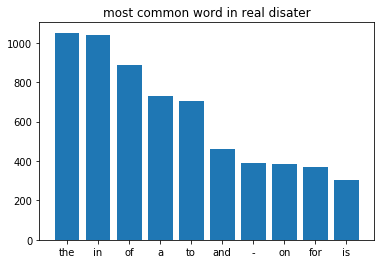

In [7]:
dic = defaultdict(int)

for x in data[data['target']==1]['text'].str.split():
        for i in x:
            dic[i] += 1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]     
x = list()
y = list()
for index in top:
    x.append(index[0])
    y.append(index[1])
    
plt.bar(x,y)
plt.title("most common word in real disater")
plt.show()

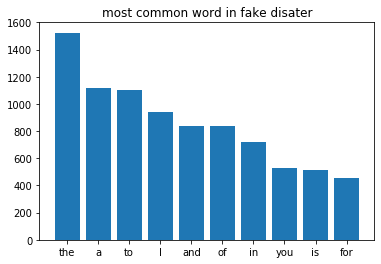

In [8]:
dic = defaultdict(int)

for x in data[data['target']==0]['text'].str.split():
        for i in x:
            dic[i] += 1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]     
x = list()
y = list()
for index in top:
    x.append(index[0])
    y.append(index[1])
    
plt.bar(x,y)
plt.title("most common word in fake disater")
plt.show()

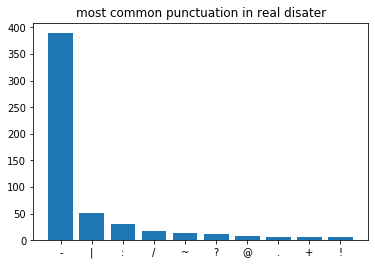

In [9]:
dic = defaultdict(int)

for x in data[data['target']==1]['text'].str.split():
        for i in x:
            if i in string.punctuation:
                dic[i] += 1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]     
x = list()
y = list()
for index in top:
    x.append(index[0])
    y.append(index[1])
    
plt.bar(x,y)
plt.title("most common punctuation in real disater")
plt.show()

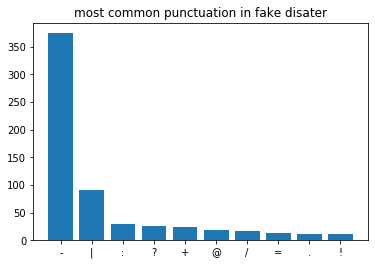

In [10]:
dic = defaultdict(int)

for x in data[data['target']==0]['text'].str.split():
        for i in x:
            if i in string.punctuation:
                dic[i] += 1
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]     
x = list()
y = list()
for index in top:
    x.append(index[0])
    y.append(index[1])
    
plt.bar(x,y)
plt.title("most common punctuation in fake disater")
plt.show()

# Data Cleaning

In [11]:
def removeURL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

ex = "hello www.google.com"
print(removeURL(ex))

hello 


In [12]:
data["text"]=data["text"].apply(lambda x: removeURL(x))
test["text"]=test["text"].apply(lambda x: removeURL(x))

In [13]:
data["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [14]:
def removeEMO(text):
    pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return pattern.sub(r'', text)

removeEMO("asdasdasdasbb sdaas s😊 ")

'asdasdasdasbb sdaas s '

In [15]:
data["text"]=data["text"].apply(lambda x: removeEMO(x))
test["text"]=test["text"].apply(lambda x: removeEMO(x))

In [16]:
data["text"]

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [17]:
def removePUN(text):
    return text.translate(str.maketrans('', '', string.punctuation))
removePUN("#hello @asdasd")

'hello asdasd'

In [18]:
data["text"]=data["text"].apply(lambda x: removePUN(x))
test["text"]=test["text"].apply(lambda x: removePUN(x))

In [19]:
data["text"]

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    ariaahrary TheTawniest The out of control wild...
7610                M194 0104 UTC5km S of Volcano Hawaii 
7611    Police investigating after an ebike collided w...
7612    The Latest More Homes Razed by Northern Califo...
Name: text, Length: 7613, dtype: object

In [46]:
def correct_words(text):
    checker = SpellChecker()
    corrected = list()
    seperate = text.split()
    unknown_words = checker.unknown(seperate)
    for words in seperate:
        if words in unknown_words:
            corrected.append(checker.correction(words))
        else:
            corrected.append(words)
    return " ".join(corrected)

correct_words("thas is cool, u are goed")

'that is cool u are good'

In [ ]:
# takes too long, need to figure out another way
# data["text"]=data["text"].apply(lambda x: correct_words(x))
# test["text"]=test["text"].apply(lambda x: correct_words(x))

In [49]:
count_vectorizer = feature_extraction.text.CountVectorizer()
sample = count_vectorizer.fit_transform(data["text"][0:5])

In [53]:
print(sample[0].todense())

[[0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]]


In [54]:
train_vec = count_vectorizer.fit_transform(data["text"])
test_vec  = count_vectorizer.transform(test["text"])

In [58]:
clf = linear_model.RidgeClassifier()

In [59]:
scores = model_selection.cross_val_score(clf, train_vec, data["target"], cv=3, scoring="f1")

In [60]:
scores

array([0.61409043, 0.55114201, 0.61568627])

In [61]:
clf.fit(train_vec, data["target"])

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [63]:
pred = clf.predict(test_vec)

In [64]:
pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)